### Importing Required Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


### Data Collection:

In [82]:


# Read the CSV file into a DataFrame
data = pd.read_csv("Downloads/Advertising.csv")


In [83]:
# Display the first few rows of the DataFrame
data.head()





,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### EDA:

In [84]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [85]:
# Get statistical summary of the data
print(data.describe().T)


            count      mean        std  min     25%     50%      75%    max
Unnamed: 0  200.0  100.5000  57.879185  1.0  50.750  100.50  150.250  200.0
TV          200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio       200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper   200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales       200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0


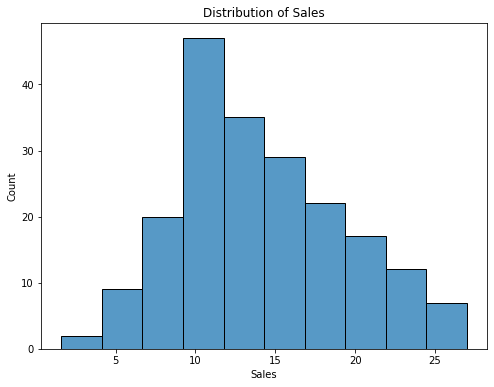

In [86]:
# Visualize the distribution of the target variable (Sales)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Sales', bins=10)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

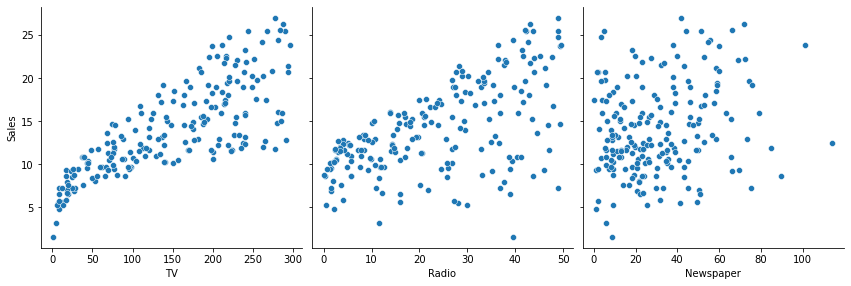

In [87]:
# Visualize the relationship between the advertising features and sales
sns.pairplot(data=data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4)
plt.show()

In [88]:
# Calculate the correlation matrix
corr_matrix = data.corr()

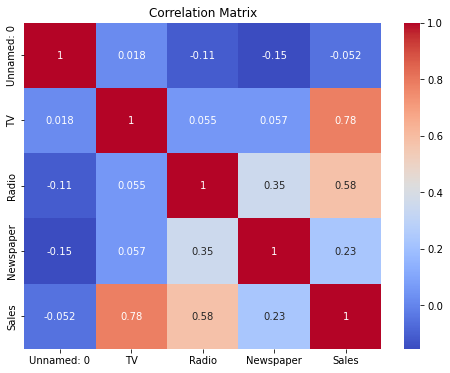

In [89]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

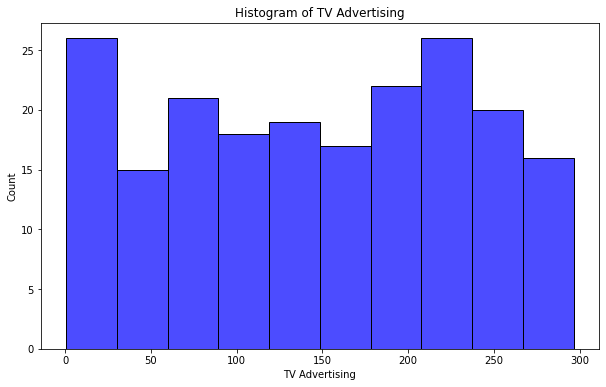

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='TV', bins=10, color='blue', alpha=0.7)
plt.title('Histogram of TV Advertising')
plt.xlabel('TV Advertising')
plt.ylabel('Count')
plt.show()



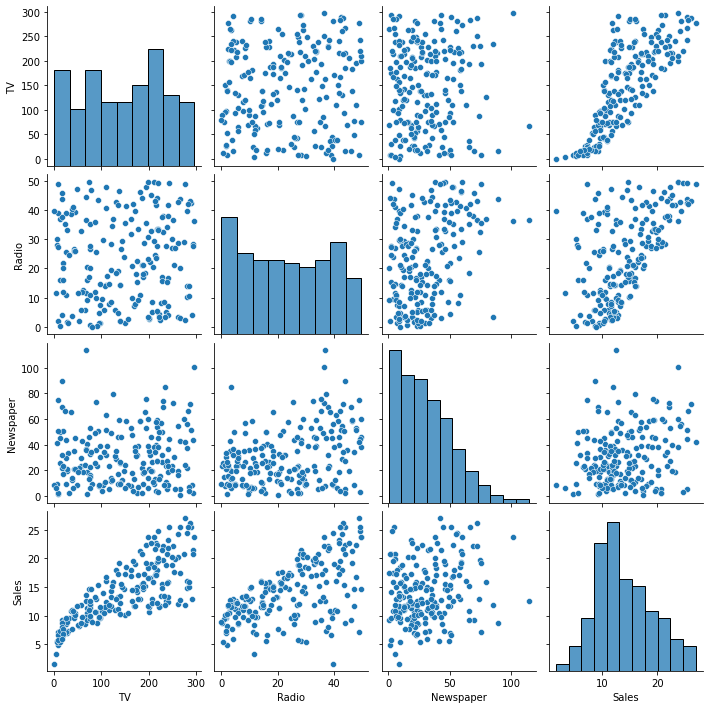

In [91]:
sns.pairplot(data=data, vars=['TV', 'Radio', 'Newspaper', 'Sales'])
plt.show()


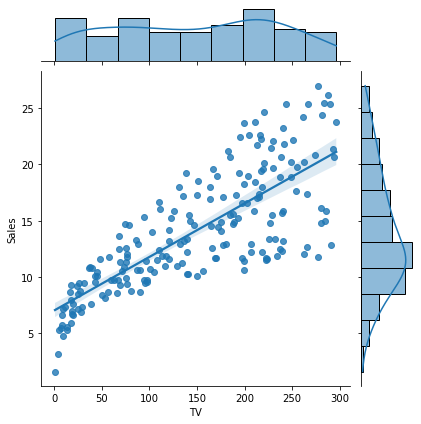

In [92]:
sns.jointplot(data=data, x='TV', y='Sales', kind='reg')
plt.show()


### Model Building:

In [93]:
# Create a Linear Regression model
model = LinearRegression()

In [94]:
# Split the data into features (X) and target variable (y)
X = data.drop("Sales", axis=1)
y = data["Sales"]

In [95]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
X_train

,Unnamed: 0,TV,Radio,Newspaper
79,80,116.0,7.7,23.1
197,198,177.0,9.3,6.4
38,39,43.1,26.7,35.1
24,25,62.3,12.6,18.3
122,123,224.0,2.4,15.6
...,...,...,...,...
106,107,25.0,11.0,29.7
14,15,204.1,32.9,46.0
92,93,217.7,33.5,59.0
179,180,165.6,10.0,17.6


In [97]:
 y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 160, dtype: float64

In [98]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [99]:
# Make predictions on the validation set
y_pred = model.predict(X_val)

In [100]:
# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

In [101]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 3.1990044685889027
Root Mean Squared Error: 1.7885761008659662
R-squared: 0.8986489151417081


In [102]:
# Create new_data DataFrame with additional "Sr. No." column
new_data = pd.DataFrame({
    "Sr. No.": [len(data) + 1],  # Provide the next sequential number
    "TV": [100],
    "Radio": [50],
    "Newspaper": [25]
})


### Sales Prediction:

In [103]:
# Use the trained model to make predictions on new data
sales_prediction = model.predict(new_data)
print("Sales Prediction:", sales_prediction)

Sales Prediction: [17.0464272]


### Conclusion:
Based on the given prediction and evaluation metrics, here is an overall conclusion:

The sales prediction for the given advertising expenses (TV: 100, Radio: 50, Newspaper: 25) is approximately 17.0464272. This prediction was made using a linear regression model trained on the provided dataset.
Overall, the model's predictions and evaluation metrics suggest that the given advertising expenses on TV, Radio, and Newspaper have a positive impact on sales, and the model can be used to make reasonable predictions for sales based on these advertising expenditures.

## Thank You